# Discussion 05

## Laplacian Eigenmaps and Spectral Clustering

Welcome to Discussion 05. In this discussion, we'll learn more about the eigenvectors of the graph Laplacian and introduce the idea of spectral clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold

plt.rcParams['figure.figsize'] = (7,7)

**Question 01**. The matrix below represents the adjacency matrix of a graph. How many connected components does this graph have?

In [2]:
top = np.hstack((
    np.ones((4,4)), np.zeros((4,4))
))
A = np.vstack((
    top, np.fliplr(top)
))
A

array([[1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.]])

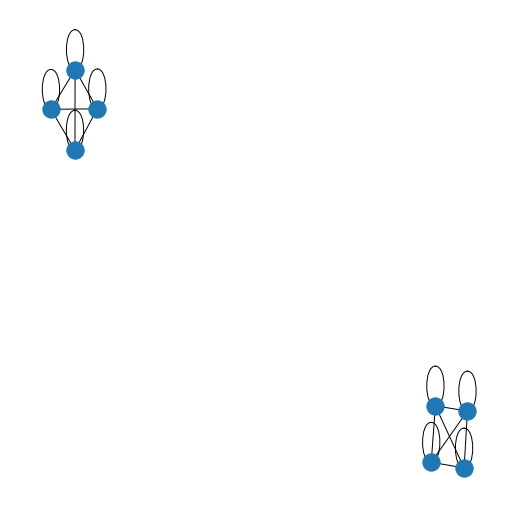

In [3]:
# Visualizing the graph
import networkx as nx
G = nx.Graph(A)
nx.draw(G)

_Type your answer here, replacing this text._

**Solution**.

The graph has two connected components, each with 4 nodes.

**Question 02**. Compute the graph Laplacian.

In [4]:
D = A.sum(axis=1) # SOLUTION NO PROMPT
L = np.diag(D) - A # SOLUTION
L

array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [-1., -1.,  3., -1.,  0.,  0.,  0.,  0.],
       [-1., -1., -1.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., -1., -1., -1.],
       [ 0.,  0.,  0.,  0., -1.,  3., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.]])

**Question 03**. In class, we saw that the vector of all ones is an eigenvector of the graph Laplacian with eigenvalue zero. Show that this is the case.

In [5]:
L @ np.ones(8) # SOLUTION

array([0., 0., 0., 0., 0., 0., 0., 0.])

**Question 04**. In this case there is more than one eigenvector with eigenvalue zero. Find another eigenvector, orthogonal to the vector of all ones, that has eigenvalue zero.

_Type your answer here, replacing this text._

**Solution**.

The vector [-1, -1, -1, -1, 1, 1, 1, 1] is an eigenvector with eigenvalue zero, orthogonal to vector of all ones.

**Question 05**. How many eigenvalues of $L$ are zero? 

In [6]:
vals, _ = np.linalg.eigh(L) # SOLUTION
vals

array([-8.9940555e-30, -8.9940555e-30,  4.0000000e+00,  4.0000000e+00,
        4.0000000e+00,  4.0000000e+00,  4.0000000e+00,  4.0000000e+00])

**Question 06**. Consider the problem of clustering the nodes of a graph. In the case of the graph above there are two "obvious" clusters: the two connected components.

Let's look at a weighted fully-connected graph with added noise. It should also have two clusters, though it is hard to determine this:

In [7]:
W = (A + .2) / 1.4 + np.random.uniform(-.1, .1, (8,8))
W = (W + W.T) / 2
W

array([[0.94748379, 0.80328957, 0.82343315, 0.79716691, 0.23172831,
        0.21112443, 0.11153313, 0.17048612],
       [0.80328957, 0.81320531, 0.91904458, 0.88625943, 0.11561477,
        0.07942943, 0.12658991, 0.21514051],
       [0.82343315, 0.91904458, 0.85476246, 0.92359027, 0.21364628,
        0.18825983, 0.17766482, 0.0981312 ],
       [0.79716691, 0.88625943, 0.92359027, 0.87769162, 0.22179353,
        0.13796533, 0.19987832, 0.18080613],
       [0.23172831, 0.11561477, 0.21364628, 0.22179353, 0.94809745,
        0.85969556, 0.85279966, 0.85978862],
       [0.21112443, 0.07942943, 0.18825983, 0.13796533, 0.85969556,
        0.79744355, 0.83083113, 0.86896651],
       [0.11153313, 0.12658991, 0.17766482, 0.19987832, 0.85279966,
        0.83083113, 0.86839334, 0.89533149],
       [0.17048612, 0.21514051, 0.0981312 , 0.18080613, 0.85978862,
        0.86896651, 0.89533149, 0.83344595]])

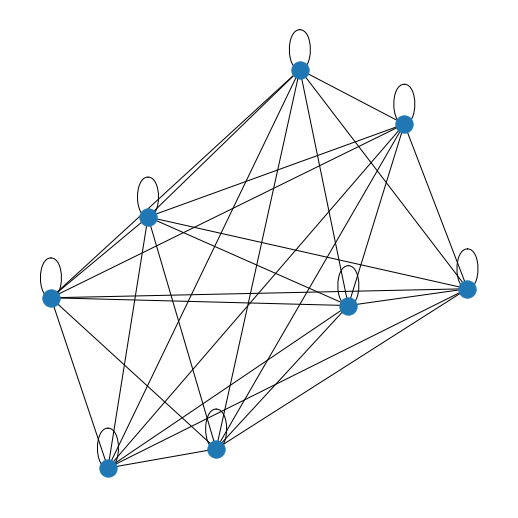

In [8]:
# Visualize the weighted graph
Gw = nx.from_numpy_matrix(W)
nx.draw(Gw)

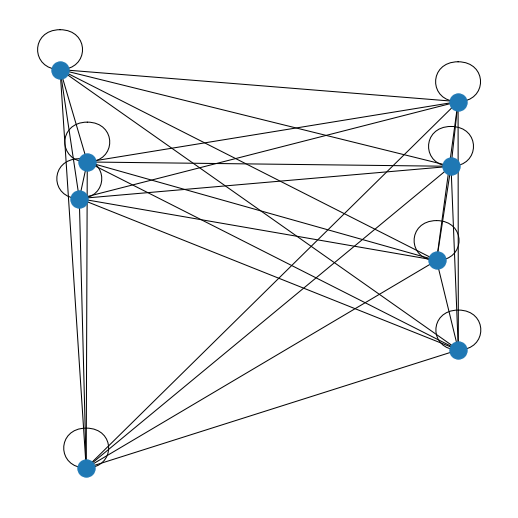

In [9]:
# Visualize the graph with a spectral layout. Check the documentation to relate spectral_layout to what we studied 
# in the lecture.
nx.draw_spectral(Gw)

Embed the nodes of this graph into $\mathbb R^2$ using Laplacian eigenmaps.

In [10]:
embedding = sklearn.manifold.spectral_embedding(W, n_components=2, norm_laplacian=False) # SOLUTION

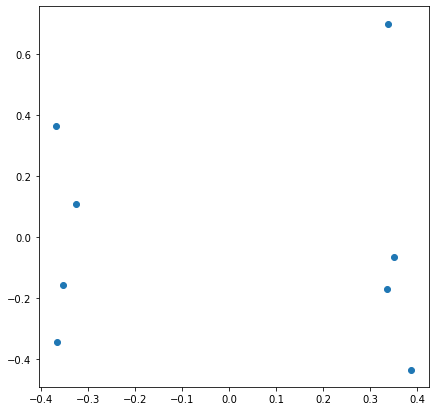

In [11]:
plt.scatter(*embedding.T)

**Question 07**. Spectral clustering is a technique used to cluster the nodes of a weighted graph. It works by first embedding the nodes of the graph using Laplacian eigenmaps, then clusters the points in the news representation using any clustering algorithm that works for points.

A popular clustering algorithm is $k$-means. It tries to find $k$ cluster centers which minimize the sum of squared distances from each point to it's nearest cluster center. Using `sklearn.cluster.KMeans`, run k-means on the embedding points with $k=2$ (to find two clusters). Verify that the cluster labels are as expected.

In [12]:
# BEGIN SOLUTION
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(embedding)
kmeans.labels_
# END SOLUTION

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

**Question 08**. Also, verify the embeddings you got from the `sklearn.manifold` library above by manually calculating them using bottom two eigenvectors with non-zero eigenvalues.

In [13]:
# BEGIN SOLUTION
D = W.sum(axis=1)
L = np.diag(D) - W
vals, vecs = np.linalg.eigh(L)
f = vecs[:, 1:3]
f
# END SOLUTION

array([[-0.33793275,  0.70028176],
       [-0.38741958, -0.43424659],
       [-0.35098379, -0.06679646],
       [-0.33587609, -0.17104009],
       [ 0.32572555,  0.10932411],
       [ 0.36695204,  0.3641223 ],
       [ 0.36644526, -0.34290454],
       [ 0.35308936, -0.1587405 ]])